Создайте модель, обрабатывающую фрагмент текста и определяющую какой вид продукции в нём содержится.

Датасет поделите на 80% / 20% - обучающая/тестовая выборки.

Используйте библиотеку `PyTorch`

Датасет: `meatinfo.csv`

Виды продукции (брать только виды продукции, для которых в датасете есть не менее 500 примеров):

Баранина

Ягнятина

Индейка

Говядина

Свинина

Кура

Цыплено

Гусь

Буйволятина

Оленина

Конина

Телятина

Кролик

Утка

Куропатка

Перепел

Глухарь

Страус

Заяц

Кенгуру

Изюбр

Кабан

Коза

Косуля

Лось

Марал

Медвежатина

Бобер

Цесарка

Нутрия

Рябчик

Тетерев

Фазан

Як

Примеры входных текстов и видов продукции:

Набор для бульона свиной Набор для бульона свиной, в наличии, 76р/кг. $ \to $ Свинина

Мясо премиум Предлагаем котлетное мясо мраморной говядины. $ \to $ Говядина

спинка цб $ \to $ Цыпленок

Проверьте вашу модель на образцах:

Говядина блочная 2 сорт в наличии ООО "АгроСоюз" реализует блочную говядину 2 сорт (80/20)
Свободный объем 8 тонн Самовывоз или доставка. Все подробности по телефону.

Куриная разделка Продам кур и куриную разделку гост и халяль по хорошей цене .Тел:

Говяжью мукозу Продам говяжью мукозу в охл и замороженном виде. Есть объем.

Загружаем датасет из файла


In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('meatinfo.csv', sep = ';')

In [13]:
df.head(25)

,text,mtype
0,12 частей баранина 12 частей баранина,Баранина
1,"Баранина, 12 частей, зам. цена 260 руб.",Баранина
2,"Баранина, 12 частей, зам. цена 315 руб.",Баранина
3,"Баранина, 12 частей, охл.",Баранина
4,"Баранина, 12 частей, охл. цена 220 руб.",Баранина
5,"Баранина, 12 частей, охл. цена 230 руб.",Баранина
6,"Баранина, 12 частей, охл. цена 270 руб.",Баранина
7,"Баранина, 12 частей, охл. цена 280 руб.",Баранина
8,"Баранина, 12 частей, охл. цена 285 руб.",Баранина
9,"Баранина, 12 частей, охл. цена 310 руб.",Баранина


In [14]:
len(df)

17893

Группировка данных и удаление лишних видов продукции

In [15]:
df_ = df.groupby('mtype').size().reset_index(name='count')
df_ = df_[df_['count'] >= 500]
df = df.merge(df_, on='mtype')

In [16]:
df

,text,mtype,count
0,12 частей баранина 12 частей баранина,Баранина,1116
1,"Баранина, 12 частей, зам. цена 260 руб.",Баранина,1116
2,"Баранина, 12 частей, зам. цена 315 руб.",Баранина,1116
3,"Баранина, 12 частей, охл.",Баранина,1116
4,"Баранина, 12 частей, охл. цена 220 руб.",Баранина,1116
...,...,...,...
16433,"Цыпленок, четвертина, задняя",Цыпленок,942
16434,"Цыпленок, четвертина, задняя цена 100 руб.",Цыпленок,942
16435,ЦБ Шеи п/ф Свеженка ГОСТ зам пак Шеи куриные П...,Цыпленок,942
16436,"Цыпленок, шея, без кожи",Цыпленок,942


Разделение датасета на выборки

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_data = []
test_data = []
val_data = []

for _, group_df in df.groupby('mtype'):
    train_group, tmp_group = train_test_split(group_df, test_size=0.2, random_state=42)
    test_group, val_group = train_test_split(tmp_group, test_size=0.5, random_state=42)
    
    train_data.append(train_group)
    test_data.append(test_group)
    val_data.append(val_group)


train_df = pd.concat(train_data)
test_df = pd.concat(test_data)
val_df = pd.concat(val_data)

In [19]:
train_text = train_df['text'].astype('str')
train_labels = train_df['mtype'].astype('str')
val_text = val_df['text'].astype('str')
val_labels = val_df['mtype'].astype('str')
test_text = test_df['text'].astype('str')
test_labels = test_df['mtype'].astype('str')

График длин текстов

(0.0, 300.0)

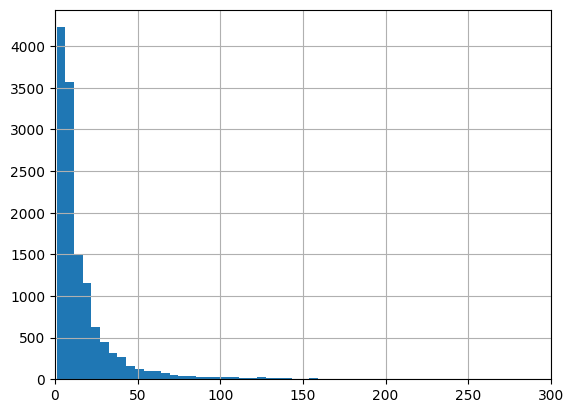

In [20]:
seq_len = [len(s.split()) for s in train_text]
ax = pd.Series(seq_len).hist(bins = 500)
ax.set_xlim(left = 0, right=300)

Оптимально число токенов - 50

Токенезация

In [21]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

max_length = 50

tokens_train = tokenizer.batch_encode_plus(train_text.values, max_length = max_length, padding = 'max_length', truncation = True)
tokens_val = tokenizer.batch_encode_plus(val_text.values, max_length = max_length, padding = 'max_length', truncation = True)
tokens_test = tokenizer.batch_encode_plus(test_text.values, max_length = max_length, padding = 'max_length', truncation = True)

Перевод в тензоры

In [23]:
df['mtype'].unique()

array(['Баранина', 'Индейка', 'Говядина', 'Свинина', 'Кура', 'Цыпленок'],
      dtype=object)

In [24]:
cat_label = {'Баранина': 0, 'Индейка': 1, 'Говядина': 2, 'Свинина': 3, 'Кура': 4, 'Цыпленок': 5}

In [25]:
import torch

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor([cat_label[cat] for cat in train_labels.values])

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor([cat_label[cat] for cat in  val_labels.values])

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor([cat_label[cat] for cat in test_labels.values])

Используем DataLoader для процесса обучения и валидации

In [26]:
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler, RandomSampler

batch_size = 10

train_data = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)

val_data =  TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)

Обучение BERT не производим

In [8]:
from transformers import AutoModel
bert = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

for param in bert.parameters():
    param.requires_grad = False

Слои на выходе модели

In [4]:
from torch import nn

class BERT(nn.Module):
    
    def __init__(self, bert, embed_dim1, embed_dim2, num_class):
        super(BERT, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.1)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(embed_dim1,embed_dim2)
        self.fc2 = nn.Linear(embed_dim2,num_class)
        self.softmax = nn.LogSoftmax(dim = 1)

    def forward(self, sent_id, mask):
        _, cls_hs = self.bert(sent_id, attention_mask = mask, return_dict = False)
        lay = self.fc1(cls_hs)
        lay = self.relu(lay)
        lay = self.dropout(lay)
        lay = self.fc2(lay)
        lay = self.softmax(lay)
        return lay

In [9]:
device = torch.device('cuda')
model = BERT(bert, 768, 512, 6)
model = model.to(device)

Для борьбы с дисбалансом - построим для каждого класса вес

In [27]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes = np.unique(train_labels), y = train_labels)

print(class_weights)

[2.45646487 0.32524368 2.04973495 1.74455945 0.89801913 2.90991589]


In [28]:
weights = torch.tensor(class_weights, dtype = torch.float)
weights = weights.to(device)

Импортируем оптимизатор и функцию потерь

In [29]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr = 1e-4)
cross_entropy = nn.CrossEntropyLoss(weights)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Функция обучения

In [24]:
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    total_preds = []
    
    for step, batch in enumerate(train_dataloader):
        batch = [r.to(device) for r in batch]
        sent_id,mask,labels = batch
        model.zero_grad()
        preds = model(sent_id, mask)
        loss = cross_entropy(preds, labels)
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        preds = preds.detach().cpu().numpy()
        total_preds.append(preds)
        
    avg_loss = total_loss / len(train_dataloader)
    total_preds = np.concatenate(total_preds, axis = 0)
    
    return avg_loss, total_preds

Функция валидации

In [25]:
def evaluate():
    model.eval()
    total_loss, total_accuracy = 0, 0
    total_preds = []

    for step, batch in enumerate(val_dataloader):
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        
        with torch.no_grad(): #!
            preds = model(sent_id, mask)
            loss = cross_entropy(preds, labels)
            total_loss = total_loss + loss.item()
            preds = preds.detach().cpu().numpy()
            total_preds.append(preds)

    avg_loss = total_loss / len(val_dataloader)
    total_preds = np.concatenate(total_preds, axis = 0)
    
    return avg_loss, total_preds

Процесс обучения и валидации

In [26]:
best_valid_loss = float('inf')

train_losses = []
valid_losses = []

epochs = 40

for epoch in range(epochs):
    print(f'\n Epoch{epoch+1} / {epochs}')
    
    train_loss, _ = train()
    valid_loss, _ = evaluate()
    
    if valid_loss < best_valid_loss: # для лучшей метрики на валидации сохраняем веса
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f'\nTraining loss: {train_loss:.3f}')
    print(f'Validation loss: {valid_loss:.3f}')


 Epoch1 / 40

Training loss: 0.817
Validation loss: 0.628

 Epoch2 / 40

Training loss: 0.470
Validation loss: 0.422

 Epoch3 / 40

Training loss: 0.382
Validation loss: 0.365

 Epoch4 / 40

Training loss: 0.346
Validation loss: 0.307

 Epoch5 / 40

Training loss: 0.336
Validation loss: 0.277

 Epoch6 / 40

Training loss: 0.318
Validation loss: 0.276

 Epoch7 / 40

Training loss: 0.290
Validation loss: 0.252

 Epoch8 / 40

Training loss: 0.286
Validation loss: 0.253

 Epoch9 / 40

Training loss: 0.282
Validation loss: 0.226

 Epoch10 / 40

Training loss: 0.278
Validation loss: 0.244

 Epoch11 / 40

Training loss: 0.264
Validation loss: 0.246

 Epoch12 / 40

Training loss: 0.264
Validation loss: 0.210

 Epoch13 / 40

Training loss: 0.262
Validation loss: 0.217

 Epoch14 / 40

Training loss: 0.261
Validation loss: 0.211

 Epoch15 / 40

Training loss: 0.251
Validation loss: 0.232

 Epoch16 / 40

Training loss: 0.252
Validation loss: 0.211

 Epoch17 / 40

Training loss: 0.250
Validation l

Загрузим лучшие веса для модели и проверим на тестовой выборке

In [30]:
model.load_state_dict(torch.load('saved_weights.pt'))

<All keys matched successfully>

In [31]:
with torch.no_grad():
    pred = model(test_seq.to(device), test_mask.to(device))

In [34]:
pred = pred.detach().cpu().numpy()

In [37]:
flat_preds = [np.argmax(pr) for pr in pred]

In [40]:
test_df['true'] = test_df['mtype'].apply(lambda x: cat_label[x]) # test_y
test_df['pred'] = flat_preds

In [41]:
test_df

,text,mtype,count,true,pred
867,"Баранина, туши, 1 категория цена 460 руб.",Баранина,1116,0,0
424,"Баранина, окорок, бк цена 545 руб.",Баранина,1116,0,0
88,"Баранина, вырезка, 1 категория цена 320 руб.",Баранина,1116,0,0
1041,оптовая продажа бараньего курдюка Регулярные о...,Баранина,1116,0,0
292,Баранина лопатка бк гост,Баранина,1116,0,0
...,...,...,...,...,...
15819,Кожа ЦБ,Цыпленок,942,5,5
15654,Грудка ЦБ с кожей 127.00 ГОСТ ООО Русптица\nг...,Цыпленок,942,5,5
16164,Окорочок ЦБ (монолит) замороженный Окорочок ЦБ...,Цыпленок,942,5,5
15527,Бедро ЦБ ГОСТ http://maximuscorp.ru Товары про...,Цыпленок,942,5,5


In [42]:
from sklearn.metrics import classification_report
print(classification_report(test_df['true'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       112
           1       0.99      0.99      0.99       134
           2       0.97      0.99      0.98       842
           3       0.97      0.93      0.95       305
           4       0.83      0.77      0.80       157
           5       0.63      0.68      0.65        94

    accuracy                           0.94      1644
   macro avg       0.89      0.89      0.89      1644
weighted avg       0.94      0.94      0.94      1644



Теперь проверим на образцах

In [44]:
text = ['Говядина блочная 2 сорт в наличии ООО "АгроСоюз" реализует блочную говядину 2 сорт (80/20) \
Свободный объем 8 тонн Самовывоз или доставка. Все подробности по телефону.',
'Куриная разделка Продам кур и куриную разделку гост и халяль по хорошей цене .Тел:',
'Говяжью мукозу Продам говяжью мукозу в охл и замороженном виде. Есть объем.']
tokens = tokenizer.batch_encode_plus(text, max_length = max_length, padding = 'max_length', truncation = True)
seq = torch.tensor(tokens['input_ids'])
mask = torch.tensor(tokens['attention_mask'])

In [48]:
with torch.no_grad():
    pred = model(seq.to(device), mask.to(device))
    pred = pred.detach().cpu().numpy()
    pred = [np.argmax(pr) for pr in pred]

In [49]:
pred

[2, 4, 2]

In [50]:
for num, elem in enumerate(text):
    print(elem, "->", next((key for key, val in cat_label.items() if val == pred[num]), None))

Говядина блочная 2 сорт в наличии ООО "АгроСоюз" реализует блочную говядину 2 сорт (80/20) Свободный объем 8 тонн Самовывоз или доставка. Все подробности по телефону. -> Говядина
Куриная разделка Продам кур и куриную разделку гост и халяль по хорошей цене .Тел: -> Кура
Говяжью мукозу Продам говяжью мукозу в охл и замороженном виде. Есть объем. -> Говядина


Модель прошла проверку
